**Chapter 3: Basics of Machine Learning**

In [ ]:
#If using Colab, you can only pull files from your Google Drive
#Run the following code to give Colab access
from google.colab import drive
drive.mount('/content/drive')

#File paths should then look like this:
file_path = '/content/drive/MyDrive/LinAlg/data/file.png'
#As opposed to your computer's directory, which might look like this:
file_path = '/Users/yourname/LinAlg/data/file.png'

In [ ]:
import numpy as np
from numpy.linalg import norm
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.animation import FuncAnimation
from sklearn.preprocessing import StandardScaler
from scipy.spatial import ConvexHull
from sklearn import svm
from numpy.linalg import norm
from math import atan, degrees
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


tWCSS calculation for N = 3 and K = 2

In [ ]:
N, K = 3, 2
mydata = np.array([[1, 1], [2, 1], [3, 3.5]])

x1 = mydata[0, :]
x2 = mydata[1, :]
x3 = mydata[2, :]

#Case C1 = (P1, P2)
c1 = (mydata[0, :] + mydata[1, :]) / 2
c2 = mydata[2, :]
tWCSS = (
    norm(x1 - c1) ** 2 +
    norm(x2 - c1) ** 2 +
    norm(x3 - c2) ** 2
)
print("WCSS for (P1, P2):", tWCSS)

#Case C1 = (P1, P3)
c1 = (mydata[0, :] + mydata[2, :]) / 2
c2 = mydata[1, :]
tWCSS = (
    norm(x1 - c1) ** 2 +
    norm(x3 - c1) ** 2 +
    norm(x2 - c2) ** 2
)
print("WCSS for (P1, P3):", tWCSS)

#Case C1 = (P2, P3)
c1 = (mydata[1, :] + mydata[2, :]) / 2
c2 = mydata[0, :]
tWCSS = (
    norm(x2 - c1) ** 2 +
    norm(x3 - c1) ** 2 +
    norm(x1 - c2) ** 2
)
print("WCSS for (P2, P3):", tWCSS)

#K-means clustering: The case C1 = (P1, P2) can be quickly found by
kmeans = KMeans(n_clusters=2, n_init='auto', random_state=0)
kmeans.fit(mydata)
print("KMeans labels:", kmeans.labels_)
print("KMeans cluster centers:\n", kmeans.cluster_centers_)

WCSS for (P1, P2): 0.5
WCSS for (P1, P3): 5.125
WCSS for (P2, P3): 3.6249999999999996
KMeans labels: [0 0 1]
KMeans cluster centers:
 [[1.5 1. ]
 [3.  3.5]]


Fig. 9.1: K-means for N = 3 and K = 2

Cluster centers:
 [[1.5 1. ]
 [3.  3.5]]


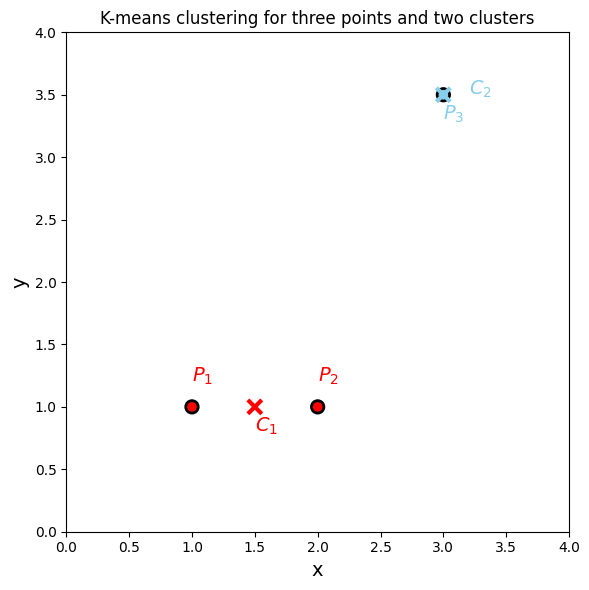

In [ ]:
N, K = 3, 2
mydata = np.array([[1, 1], [2, 1], [3, 3.5]])

#K-means clustering
kmeans = KMeans(n_clusters=K, n_init='auto', random_state=0)
kmeans.fit(mydata)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

print("Cluster centers:\n", centers)

#Plot the points and cluster centers
plt.figure(figsize=(6, 6))
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('K-means clustering for three points and two clusters', fontsize=12)

colors = ['red' if label == 0 else 'skyblue' for label in labels]

#Plot data points
plt.scatter(mydata[:, 0], mydata[:, 1], s=80, color=colors, edgecolor='black', linewidth=2)

#Plot cluster centers
plt.scatter(centers[:, 0], centers[:, 1], color=['red', 'skyblue'], marker='x', s=100, linewidths=3)

#Labels
plt.text(1.5, 0.8, r'$C_1$', color='red', fontsize=14)
plt.text(3.2, 3.5, r'$C_2$', color='skyblue', fontsize=14)
plt.text(1, 1.2, r'$P_1$', color='red', fontsize=14)
plt.text(2, 1.2, r'$P_2$', color='red', fontsize=14)
plt.text(3, 3.3, r'$P_3$', color='skyblue', fontsize=14)

plt.grid(False)
plt.tight_layout()
plt.show()

Fig. 9.2: K-means clustering for 2001 daily weather

(7305, 29)


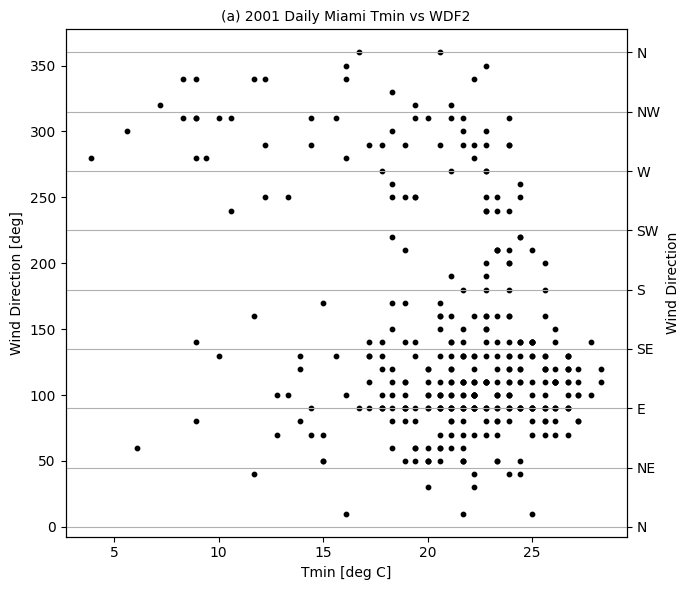

Cluster centers:
 [[ 18.38607595 278.86075949]
 [ 21.93356643 103.91608392]]
Total WCSS: 457844.86681419844


<ipython-input-5-de7537f58f97>:72: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


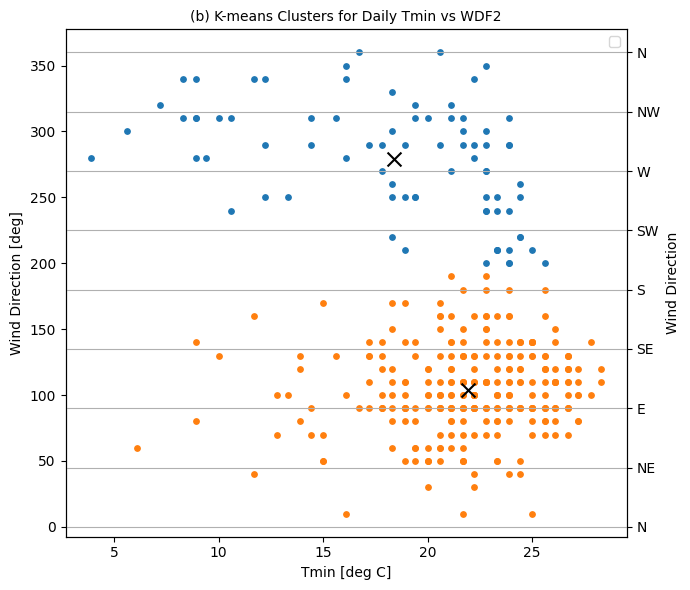

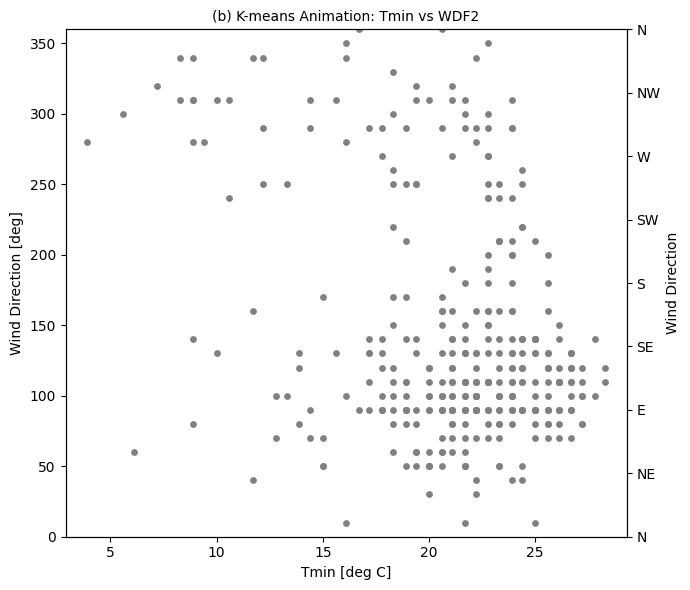

In [ ]:
#Data at Miami International Airport, Station ID USW00012839
df = pd.read_csv("/content/drive/MyDrive/LinAlg/data/MiamiIntlAirport2001_2020.csv")
print(df.shape)  #(7305, 29)

#Tmin and WDF2
tmin = df['TMIN'].to_numpy()
wdf2 = df['WDF2'].to_numpy()

#Subset: days 2 to 366 (corresponding to year 2001)
tmin_sub = tmin[1:366]
wdf2_sub = wdf2[1:366]

#Scatter plot: Tmin vs WDF2
plt.figure(figsize=(7, 6))
plt.scatter(tmin_sub, wdf2_sub, s=10, c='black')
plt.xlabel('Tmin [deg C]')
plt.ylabel('Wind Direction [deg]')
plt.title('(a) 2001 Daily Miami Tmin vs WDF2', fontsize=10)

#Add right axis with compass labels
ax = plt.gca()
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks([0, 45, 90, 135, 180, 225, 270, 315, 360])
ax2.set_yticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW', 'N'])
ax2.set_ylabel('Wind Direction')

plt.grid(True)
plt.tight_layout()
plt.show()

#K-means clustering
K = 2
mydata = np.column_stack((tmin_sub, wdf2_sub))
kmeans = KMeans(n_clusters=K, n_init='auto', random_state=0)
kmeans.fit(mydata)

#Output cluster centers and total WCSS
print("Cluster centers:\n", kmeans.cluster_centers_)
print("Total WCSS:", kmeans.inertia_)

#Clustered data
clustered_df = pd.DataFrame({
    'Tmin [deg C]': tmin_sub,
    'Wind Direction [deg]': wdf2_sub,
    'Cluster': kmeans.labels_
})

#Visualize clusters
plt.figure(figsize=(7, 6))
for cluster_id in range(K):
    cluster_data = clustered_df[clustered_df['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Tmin [deg C]'], cluster_data['Wind Direction [deg]'],
                label=f'Cluster {cluster_id + 1}', s=15)

#Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='x', s=100, label='Centers')

plt.xlabel('Tmin [deg C]')
plt.ylabel('Wind Direction [deg]')
plt.title('(b) K-means Clusters for Daily Tmin vs WDF2', fontsize=10)

#Right axis with compass directions
ax = plt.gca()
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks([0, 45, 90, 135, 180, 225, 270, 315, 360])
ax2.set_yticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW', 'N'])
ax2.set_ylabel('Wind Direction')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

###---Experimental Animated Version---###

df = pd.read_csv("/content/drive/MyDrive/LinAlg/data/MiamiIntlAirport2001_2020.csv")
tmin = df['TMIN'].to_numpy()[1:366]
wdf2 = df['WDF2'].to_numpy()[1:366]
data = np.column_stack((tmin, wdf2))

#Custom K-means implementation to store center history
class KMeansTracker:
    def __init__(self, n_clusters, max_iter=10, random_state=0):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centers_history = []
        self.labels_ = None

    def fit(self, X):
        np.random.seed(self.random_state)
        idx = np.random.choice(len(X), self.n_clusters, replace=False)
        centers = X[idx]
        self.centers_history.append(centers.copy())

        for _ in range(self.max_iter):
            labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centers, axis=2), axis=1)
            new_centers = np.array([X[labels == i].mean(axis=0) if np.any(labels == i) else centers[i]
                                    for i in range(self.n_clusters)])
            self.centers_history.append(new_centers.copy())

            if np.allclose(centers, new_centers):
                break
            centers = new_centers

        self.labels_ = labels
        self.final_centers_ = centers

#Run tracked KMeans
tracker = KMeansTracker(n_clusters=2, max_iter=10)
tracker.fit(data)

#Setup plot
fig, ax = plt.subplots(figsize=(7, 6))
scat = ax.scatter(data[:, 0], data[:, 1], c='gray', s=15)
cent_scat = ax.scatter([], [], c=[], marker='x', s=100)
ax.set_xlim(min(tmin) - 1, max(tmin) + 1)
ax.set_ylim(0, 360)
ax.set_xlabel('Tmin [deg C]')
ax.set_ylabel('Wind Direction [deg]')
ax.set_title('(b) K-means Animation: Tmin vs WDF2', fontsize=10)
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks([0, 45, 90, 135, 180, 225, 270, 315, 360])
ax2.set_yticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW', 'N'])
ax2.set_ylabel('Wind Direction')

#Update function for animation
def update(i):
    centers = tracker.centers_history[i]
    cent_scat.set_offsets(centers)
    ax.set_title(f'Iteration {i} of K-means', fontsize=10)

#Animate
ani = FuncAnimation(fig, update, frames=len(tracker.centers_history), interval=800, repeat=False)

plt.tight_layout()
plt.show()

Fig. 9.3: tWCSS(K) and pWCSS(K)

(7305, 29)


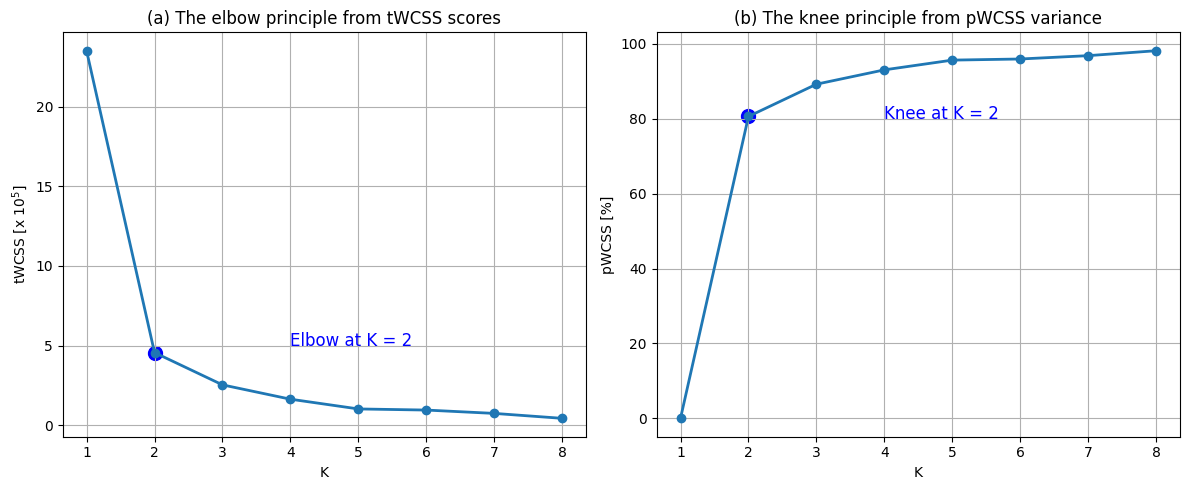

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/LinAlg/data/MiamiIntlAirport2001_2020.csv")
print(df.shape)  #(7305, 29)

tmin = df['TMIN'].to_numpy()
tmax = df['TMAX'].to_numpy()
wdf2 = df['WDF2'].to_numpy()

#2001 subset
mydata = np.column_stack((tmax[1:366], wdf2[1:366]))

#Compute tWCSS for K = 1 to 8
twcss = []
for K in range(1, 9):
    kmeans = KMeans(n_clusters=K, n_init='auto', random_state=0)
    kmeans.fit(mydata)
    twcss.append(kmeans.inertia_)

twcss = np.array(twcss)

#Elbow principle plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(np.arange(1, 9), twcss / 1e5, 'o-', linewidth=2)
plt.xlabel('K')
plt.ylabel(r'tWCSS [x $10^5$]')
plt.title('(a) The elbow principle from tWCSS scores', fontsize=12)
plt.xticks(range(1, 9))
plt.scatter(2, twcss[1] / 1e5, s=100, color='blue')
plt.text(4, 5, 'Elbow at K = 2', color='blue', fontsize=12)
plt.grid(True)

#Knee principle plot
pWCSS = 100 * (twcss[0] - twcss) / twcss[0]
plt.subplot(1, 2, 2)
plt.plot(np.arange(1, 9), pWCSS, 'o-', linewidth=2)
plt.xlabel('K')
plt.ylabel('pWCSS [%]')
plt.title('(b) The knee principle from pWCSS variance', fontsize=12)
plt.xticks(range(1, 9))
plt.scatter(2, pWCSS[1], s=100, color='blue')
plt.text(4, 80, 'Knee at K = 2', color='blue', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

Fig. 9.3b: pWCSS(K) for the knee principle

Scaled cluster centers:
[[ 0.22552501 -0.4313079 ]
 [-0.91776149  1.75518352]]
Total WCSS: 378.13902417647324
Cluster centers in original units:
[[ 22.15426621 107.20136519]
 [ 17.14305556 282.5       ]]


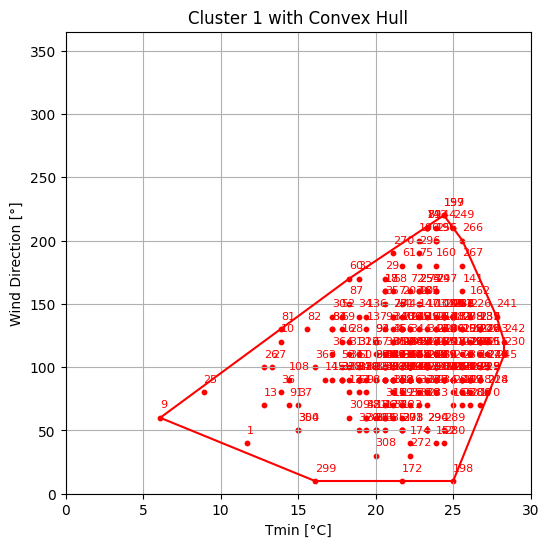

Max absolute error in tmin rescaling: 1.7763568394002505e-15


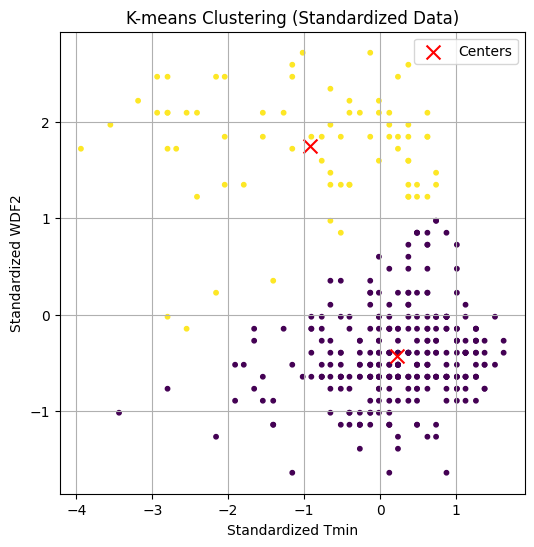

/usr/local/lib/python3.11/dist-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


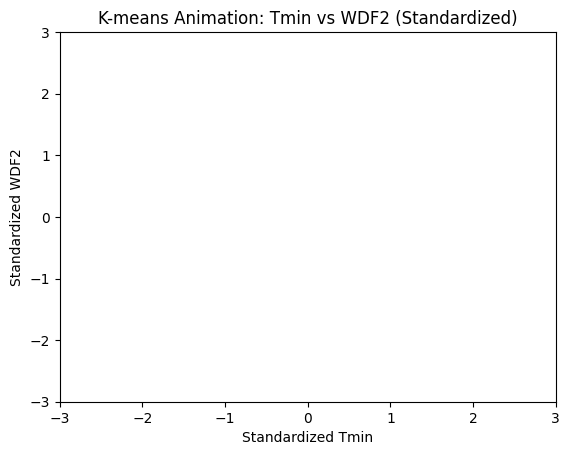

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/LinAlg/data/MiamiIntlAirport2001_2020.csv")
tmin = df['TMIN'].to_numpy()[1:366]
wdf2 = df['WDF2'].to_numpy()[1:366]
mydata = np.column_stack((tmin, wdf2))

#Standardize the data
scaler = StandardScaler()
mydataS = scaler.fit_transform(mydata)

#K-means clustering
K = 2
kmeans = KMeans(n_clusters=K, n_init='auto', random_state=0)
kmeans.fit(mydataS)

print("Scaled cluster centers:")
print(kmeans.cluster_centers_)

#Total within-cluster sum of squares (WCSS)
print("Total WCSS:", kmeans.inertia_)

#Convert centers back to original scale
centers_original = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster centers in original units:")
print(centers_original)

#Plot cluster 1 with convex hull
labels = kmeans.labels_
cluster1 = mydata[labels == 0]  #Assuming cluster 1 is label 0
indices = np.arange(1, 366)[labels == 0]  #Corresponding day indices

plt.figure(figsize=(6, 6))
plt.scatter(cluster1[:, 0], cluster1[:, 1], c='red', s=10)
plt.xlim(0, 30)
plt.ylim(0, 365)
plt.grid(True)

#Convex hull
hull = ConvexHull(cluster1)
for simplex in hull.simplices:
    plt.plot(cluster1[simplex, 0], cluster1[simplex, 1], 'r-')

#Add text labels for each point
for i in range(len(cluster1)):
    plt.text(cluster1[i, 0], cluster1[i, 1] + 8, str(indices[i]), fontsize=8, color='red')

plt.title("Cluster 1 with Convex Hull")
plt.xlabel("Tmin [°C]")
plt.ylabel("Wind Direction [°]")
plt.show()

#Check if inverse scaling works (should be near zero)
rescaled_tmin = scaler.inverse_transform(mydataS)[:, 0]
print("Max absolute error in tmin rescaling:", np.max(np.abs(rescaled_tmin - tmin)))

#Cluster visualization (static)
plt.figure(figsize=(6, 6))
plt.scatter(mydataS[:, 0], mydataS[:, 1], c=labels, cmap='viridis', s=10)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='x', s=100, label='Centers')
plt.xlabel('Standardized Tmin')
plt.ylabel('Standardized WDF2')
plt.title("K-means Clustering (Standardized Data)")
plt.legend()
plt.grid(True)
plt.show()

###---Experimental Animated Version---###

dat = pd.read_csv("/content/drive/MyDrive/LinAlg/data/MiamiIntlAirport2001_2020.csv")
tmin = dat['TMIN'].values[1:366]
wdf2 = dat['WDF2'].values[1:366]

#Standardize
scaler = StandardScaler()
mydataS = scaler.fit_transform(np.column_stack((tmin, wdf2)))

#KMeans clustering
K = 2
kmeans = KMeans(n_clusters=K, init='random', n_init=1, max_iter=1, random_state=42)
centroids = []
labels_list = []

#Plot
fig, ax = plt.subplots()
colors = ['red', 'blue']
scatter = ax.scatter([], [], s=10)
centroid_plot = ax.scatter([], [], marker='x', s=100, c='black')

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_title("K-means Animation: Tmin vs WDF2 (Standardized)")
ax.set_xlabel("Standardized Tmin")
ax.set_ylabel("Standardized WDF2")

#Animation update function
def update(frame):
    global kmeans
    kmeans = KMeans(n_clusters=K, init=kmeans.cluster_centers_, n_init=1, max_iter=1, random_state=42)
    kmeans.fit(mydataS)

    scatter.set_offsets(mydataS)
    scatter.set_color([colors[label] for label in kmeans.labels_])
    centroid_plot.set_offsets(kmeans.cluster_centers_)

    return scatter, centroid_plot

ani = FuncAnimation(fig, update, frames=10, interval=800, repeat=False)
plt.show()

Fig. 9.4: Convex hull for a cluster

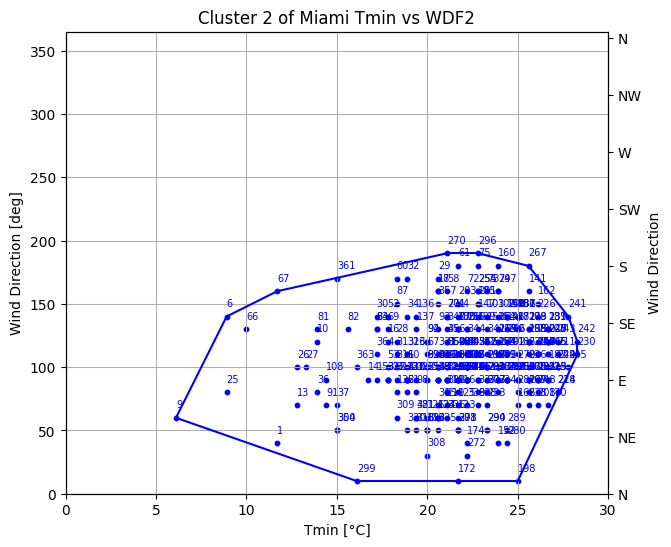

In [ ]:
dat = pd.read_csv("/content/drive/MyDrive/LinAlg/data/MiamiIntlAirport2001_2020.csv")
tmin = dat['TMIN'].values
wdf2 = dat['WDF2'].values

#Prepare data for 2001 (day 2 to 366)
mydata = np.column_stack((tmin[1:366], wdf2[1:366]))  # Python uses 0-based indexing
N = 365
K = 2

#K-means clustering
kmeans = KMeans(n_clusters=K, random_state=0).fit(mydata)
labels = kmeans.labels_

# Combine with day index
plotdat = np.column_stack((np.arange(1, N+1), mydata, labels))

#Select cluster i = 2 (remember Python is 0-based, so i = 1)
i = 1
X = plotdat[plotdat[:, 3] == i, :3]  #Get day, Tmin, WDF2

#Plot
plt.figure(figsize=(7, 6))
plt.scatter(X[:, 1], X[:, 2], s=10, color='blue', label='Cluster 2')
plt.xlim(0, 30)
plt.ylim(0, 365)
plt.xlabel('Tmin [°C]')
plt.ylabel('Wind Direction [deg]')
plt.title('Cluster 2 of Miami Tmin vs WDF2')
plt.grid(True)

#Convex hull boundary
hull = ConvexHull(X[:, 1:3])
for simplex in hull.simplices:
    plt.plot(X[simplex, 1], X[simplex, 2], 'b-')

#Annotate with day numbers
for row in X:
    plt.text(row[1], row[2] + 8, str(int(row[0])), fontsize=7, color='blue')

#Add compass directions on right y-axis
ax = plt.gca()
ax2 = ax.twinx()
ax2.set_ylim(0, 365)
ax2.set_yticks([0, 45, 90, 135, 180, 225, 270, 315, 360])
ax2.set_yticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW', 'N'])
ax2.set_ylabel('Wind Direction')

plt.show()

Fig. 9.5: Maximum difference between two points

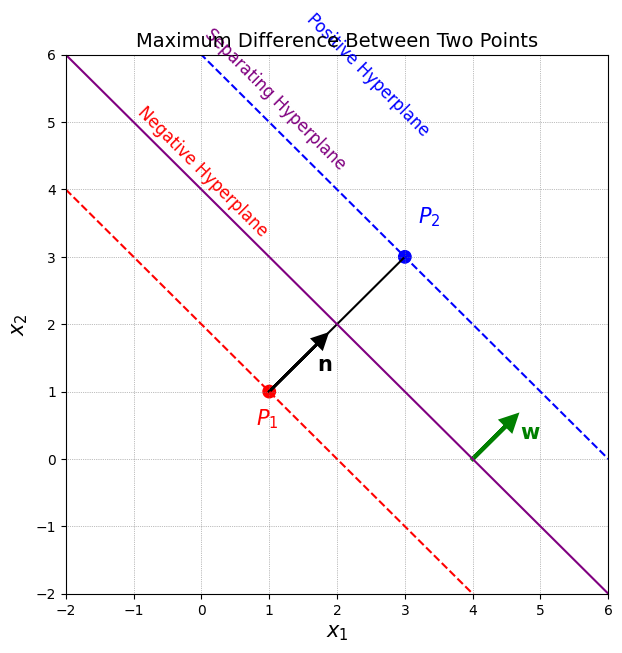

In [ ]:
x = np.array([[1, 1], [3, 3]])
y = np.array([-1, 1])  # Labels

#Plot setup
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_xlim(-2, 6)
ax.set_ylim(-2, 6)

#Colored points
colors = ['red' if label == -1 else 'blue' for label in y]
ax.scatter(x[:, 0], x[:, 1], color=colors, s=80)

#Background lines/axis tics
for i in range(-2, 7):
    ax.axhline(i, color='grey', linestyle='dotted', linewidth=0.5)
    ax.axvline(i, color='grey', linestyle='dotted', linewidth=0.5)

#Connecting the points
ax.plot([1, 3], [1, 3], color='black')

#Vector n arrow
ax.arrow(1, 1, 0.71, 0.71, head_width=0.2, head_length=0.2, fc='black', ec='black', linewidth=2)
ax.text(1.71, 1.31, r'$\mathbf{n}$', fontsize=15)

#Weight vector w arrow
ax.arrow(4, 0, 0.5, 0.5, head_width=0.2, head_length=0.2, fc='green', ec='green', linewidth=3)
ax.text(4.7, 0.3, r'$\mathbf{w}$', fontsize=15, color='green')

#Separating hyperplane and margins
x1 = np.linspace(-2, 6, 100)
x20 = 4 - x1           #Separating hyperplane
x2m = 2 - x1           #Negative margin
x2p = 6 - x1           #Positive margin

ax.plot(x1, x20, color='purple', linewidth=1.5, label='Separating Hyperplane')
ax.plot(x1, x2m, 'r--', label='Negative Hyperplane')
ax.plot(x1, x2p, 'b--', label='Positive Hyperplane')

ax.text(0.8, 0.5, r'$P_1$', fontsize=15, color='red')
ax.text(3.2, 3.5, r'$P_2$', fontsize=15, color='blue')

ax.text(0, 4.3, 'Separating Hyperplane', fontsize=12, rotation=-45, color='purple')
ax.text(1.5, 4.8, 'Positive Hyperplane', fontsize=12, rotation=-45, color='blue')
ax.text(-1, 3.3, 'Negative Hyperplane', fontsize=12, rotation=-45, color='red')

ax.set_xlabel(r'$x_1$', fontsize=15)
ax.set_ylabel(r'$x_2$', fontsize=15)

plt.title("Maximum Difference Between Two Points", fontsize=14)
plt.show()

Fig. 9.6: SVM for three points

Weight vector w: [-0.27586207 -0.68965517]
Bias b: 2.2413793103448274
Margin: 2.6925824035672523


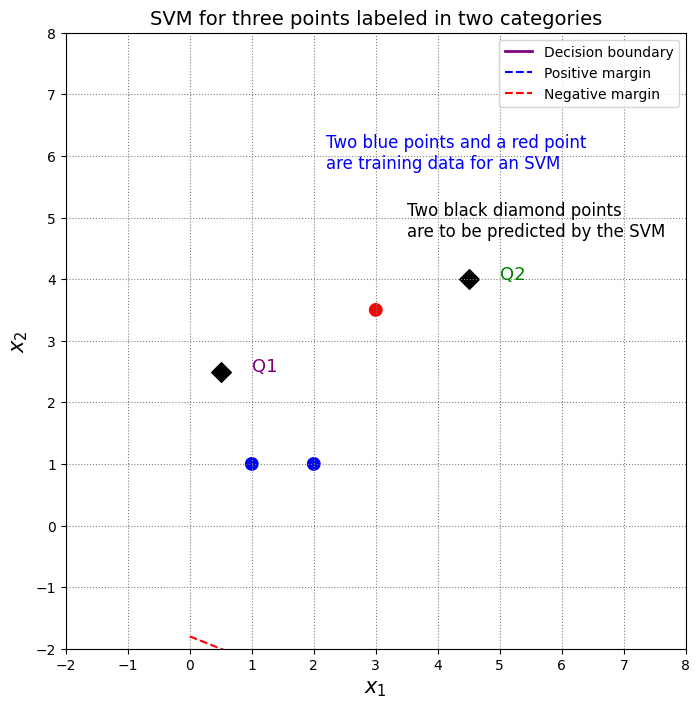

In [ ]:
#Training data
x = np.array([[1, 1], [2, 1], [3, 3.5]])
y = np.array([1, 1, -1])

#Plot training points
plt.figure(figsize=(8, 8))
colors = ['blue' if label == 1 else 'red' for label in y]
plt.scatter(x[:, 0], x[:, 1], c=colors, s=80)

#Train SVM with linear kernel
clf = svm.SVC(kernel='linear', C=10)
clf.fit(x, y)

#Predict new points
xnew = np.array([[0.5, 2.5], [4.5, 4]])
preds = clf.predict(xnew)

#Get weights and bias
w = clf.coef_[0]
b = clf.intercept_[0]

#Max margin
margin = 2 / norm(w)
print("Weight vector w:", w)
print("Bias b:", b)
print("Margin:", margin)

#Plot hyperplanes
x1 = np.linspace(0, 5, 100)
x2 = (b - w[0] * x1) / w[1]              #separating hyperplane
x2p = (1 + b - w[0] * x1) / w[1]         #positive margin
x2m = (-1 + b - w[0] * x1) / w[1]        #negative margin

plt.plot(x1, x2, 'purple', linewidth=2, label='Decision boundary')
plt.plot(x1, x2p, 'b--', label='Positive margin')
plt.plot(x1, x2m, 'r--', label='Negative margin')

#Plot new points
plt.scatter(xnew[:, 0], xnew[:, 1], marker='D', s=100, color='black')

plt.text(xnew[0, 0] + 0.5, xnew[0, 1], 'Q1', fontsize=13, color='purple')
plt.text(xnew[1, 0] + 0.5, xnew[1, 1], 'Q2', fontsize=13, color='green')

plt.xlim(0, 6)
plt.ylim(0, 6)
plt.xlabel(r'$x_1$', fontsize=15)
plt.ylabel(r'$x_2$', fontsize=15)
plt.xticks(range(-2, 9))
plt.yticks(range(-2, 9))
plt.grid(True, linestyle='dotted', color='grey')
plt.title('SVM for three points labeled in two categories', fontsize=14)

plt.text(2.2, 5.8, "Two blue points and a red point\nare training data for an SVM",
         fontsize=12, color='blue')
plt.text(3.5, 4.7, "Two black diamond points\nare to be predicted by the SVM",
         fontsize=12)

plt.legend()
plt.show()

Fig. 9.7: SVM for many points

Weight vector w: [ 0.39996 -0.53328]
Bias b: 1.2665733333333342
Maximum margin: 3.0003000300029994
Predictions for new points: [2 2 1]


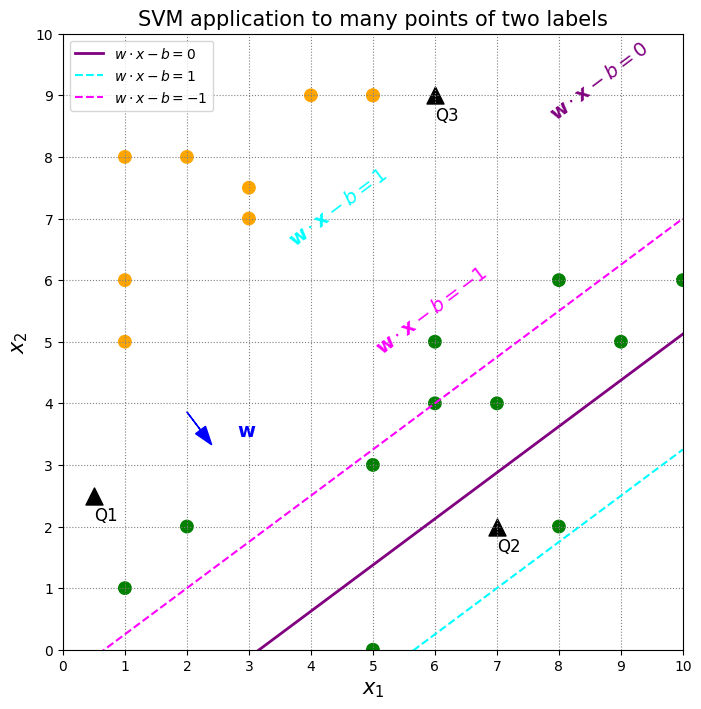

In [ ]:
#Training data
x = np.array([
    [1, 6], [2, 8], [3, 7.5], [1, 8], [4, 9], [5, 9], [3, 7], [5, 9], [1, 5],
    [5, 3], [6, 4], [7, 4], [8, 6], [9, 5], [10, 6], [5, 0], [6, 5], [8, 2], [2, 2], [1, 1]
])
y = np.array([1]*9 + [2]*11)

#Train SVM
clf = svm.SVC(kernel='linear', C=10)
clf.fit(x, y)

#Get parameters: w, b
w = clf.coef_[0]
b = clf.intercept_[0]
margin = 2 / norm(w)
print("Weight vector w:", w)
print("Bias b:", b)
print("Maximum margin:", margin)

#Decision boundary
x1 = np.linspace(0, 10, 100)
x2 = (b - w[0]*x1) / w[1]
x2p = (1 + b - w[0]*x1) / w[1]
x2m = (-1 + b - w[0]*x1) / w[1]

#Plot
plt.figure(figsize=(8, 8))
colors = ['orange' if label == 1 else 'green' for label in y]
plt.scatter(x[:, 0], x[:, 1], c=colors, s=80)

#SVM lines
plt.plot(x1, x2, 'purple', linewidth=2, label=r'$w \cdot x - b = 0$')
plt.plot(x1, x2p, linestyle='--', color='cyan', label=r'$w \cdot x - b = 1$')
plt.plot(x1, x2m, linestyle='--', color='magenta', label=r'$w \cdot x - b = -1$')

#Labels and margins
theta = degrees(atan(-w[0]/w[1]))
delx = 1.4
dely = delx * (-w[0]/w[1])

plt.text(5 + 2*delx, 6.5 + 2*dely, r'$\mathbf{w} \cdot \mathbf{x} - b = 0$', rotation=theta, fontsize=14, color='purple')
plt.text(5 - delx, 7.6 - dely, r'$\mathbf{w} \cdot \mathbf{x} - b = 1$', rotation=theta, fontsize=14, color='cyan')
plt.text(5, 4.8, r'$\mathbf{w} \cdot \mathbf{x} - b = -1$', rotation=theta, fontsize=14, color='magenta')

#Normal vector
plt.arrow(2, 3.86, w[0], w[1], color='blue', head_width=0.2, length_includes_head=True)
plt.text(2 + w[0] + 0.4, 4 + w[1], r'$\mathbf{w}$', fontsize=14, color='blue')

plt.xticks(range(0, 11))
plt.yticks(range(0, 11))
plt.grid(True, linestyle='dotted', color='grey')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel(r'$x_1$', fontsize=15)
plt.ylabel(r'$x_2$', fontsize=15)
plt.title('SVM application to many points of two labels', fontsize=15)
plt.legend()

#New points to predict
xnew = np.array([[0.5, 2.5], [7, 2], [6, 9]])
plt.scatter(xnew[:, 0], xnew[:, 1], marker='^', s=150, color='black')

#Predictions
preds = clf.predict(xnew)
print("Predictions for new points:", preds)

#Annotate new points
for i in range(len(xnew)):
    plt.text(xnew[i, 0], xnew[i, 1] - 0.4, f"Q{i+1}", fontsize=12)

plt.show()

Fig. 9.8: R.A. Fisher data of three iris species

Dimensions: (150, 5)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   

   target  
0       0  
1       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


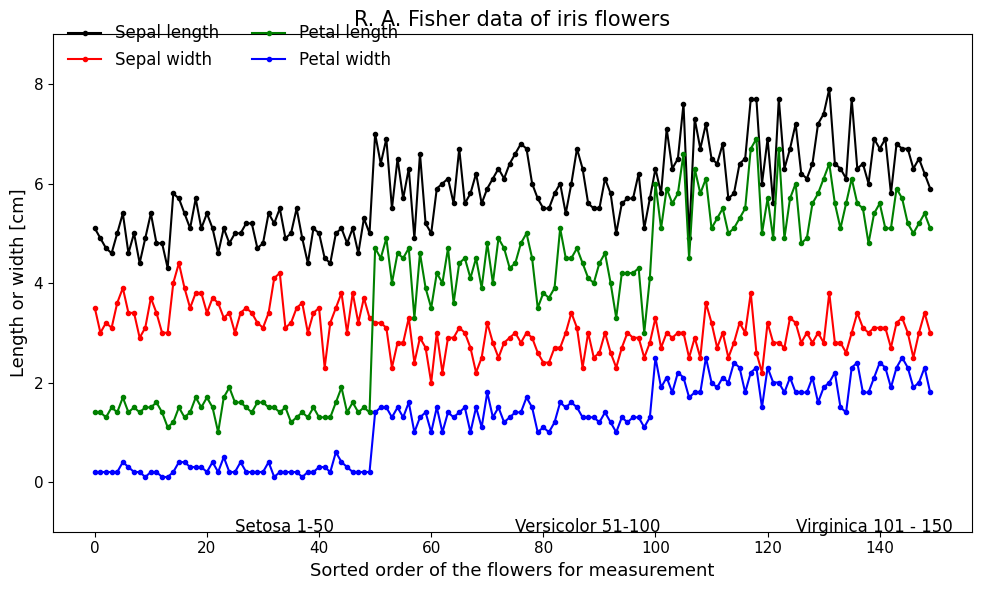

In [ ]:
#Load the iris dataset
iris_data = load_iris(as_frame=True)
iris = iris_data.frame
print("Dimensions:", iris.shape)
print(iris.head(2))  #First two rows

print(iris.info())  #Structure of the data

#Plot the features
plt.figure(figsize=(10, 6))
plt.plot(iris.iloc[:, 0], 'o-', markersize=3, label='Sepal length', color='black')
plt.plot(iris.iloc[:, 1], 'o-', markersize=3, label='Sepal width', color='red')
plt.plot(iris.iloc[:, 2], 'o-', markersize=3, label='Petal length', color='green')
plt.plot(iris.iloc[:, 3], 'o-', markersize=3, label='Petal width', color='blue')

plt.ylim(-1, 9)
plt.xlabel('Sorted order of the flowers for measurement', fontsize=13)
plt.ylabel('Length or width [cm]', fontsize=13)
plt.title('R. A. Fisher data of iris flowers', fontsize=15)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.legend(loc='upper left', bbox_to_anchor=(0, 1.05), ncol=2, fontsize=12, frameon=False)

plt.text(25, -1, 'Setosa 1-50', fontsize=12)
plt.text(75, -1, 'Versicolor 51-100', fontsize=12)
plt.text(125, -1, 'Virginica 101 - 150', fontsize=12)

plt.tight_layout()
plt.show()

Random Forest experiment on the Fisher iris data

RandomForestClassifier(n_estimators=800, oob_score=True, random_state=8)


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too fe

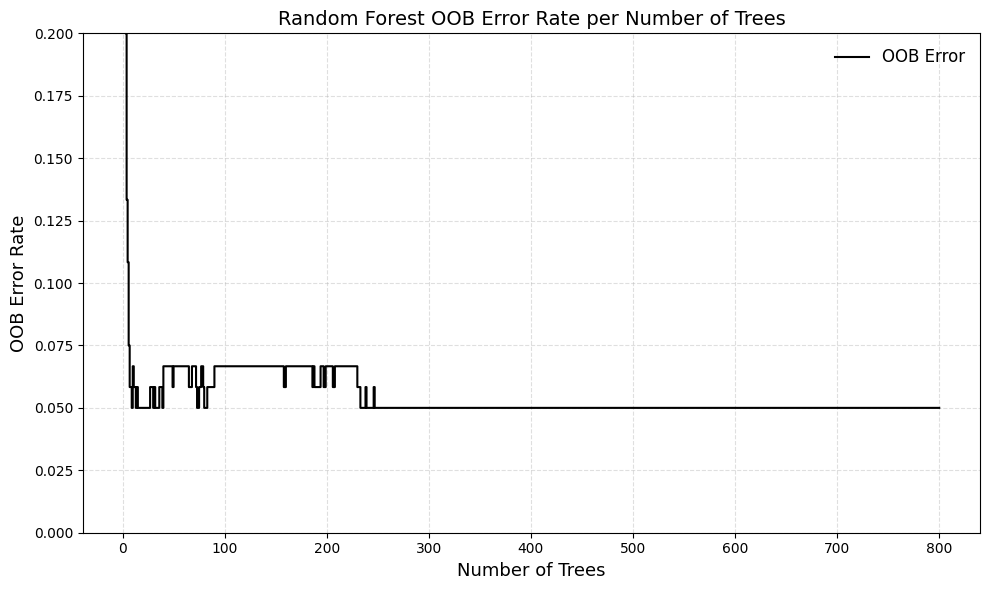

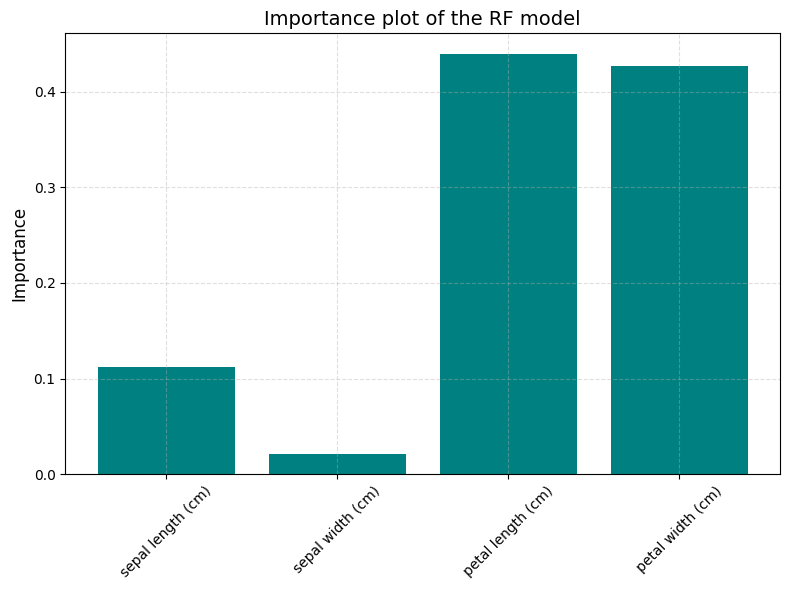

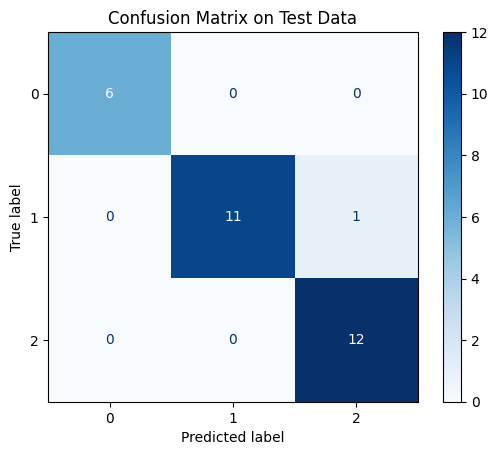

RandomForestClassifier(n_estimators=500, random_state=8)

In [ ]:
#Load iris dataset
iris_data = load_iris(as_frame=True)
iris = iris_data.frame
iris.columns = list(iris.columns[:-1]) + ['Species']

#Randomly select 120 observations as training data
np.random.seed(8)
train_id = np.sort(np.random.choice(range(150), 120, replace=False))
train_data = iris.iloc[train_id]
new_data = iris.drop(train_id)

#Train initial Random Forest model (for summary purposes)
rf_model = RandomForestClassifier(n_estimators=800, random_state=8, oob_score=True)
rf_model.fit(train_data.iloc[:, :4], train_data['Species'])
print(rf_model)

#Track OOB error over increasing number of trees using warm_start
oob_errors = []
rf_incremental = RandomForestClassifier(warm_start=True, oob_score=True, random_state=8)

for i in range(1, 801):
    rf_incremental.set_params(n_estimators=i)
    rf_incremental.fit(train_data.iloc[:, :4], train_data['Species'])
    oob_errors.append(1 - rf_incremental.oob_score_)
#May take a minute or two!

#Plot error rates (Fig. 9.9a)
plt.figure(figsize=(10, 6))
tree_nums = np.arange(1, 801)
plt.plot(tree_nums, oob_errors, label='OOB Error', color='black', drawstyle='steps-post')
plt.ylim(0, 0.2)
plt.xlabel('Number of Trees', fontsize=13)
plt.ylabel('OOB Error Rate', fontsize=13)
plt.title('Random Forest OOB Error Rate per Number of Trees', fontsize=14)
plt.legend(loc='upper right', fontsize=12, frameon=False)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

#Feature importance (Fig. 9.9b)
importances = rf_model.feature_importances_
feature_names = iris_data.feature_names

plt.figure(figsize=(8, 6))
plt.bar(feature_names, importances, color='teal')
plt.title('Importance plot of the RF model', fontsize=14)
plt.ylabel('Importance', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

#Confusion matrix
y_true = new_data['Species']
y_pred = rf_model.predict(new_data.iloc[:, :4])
class_labels = np.unique(train_data['Species'])
cm = confusion_matrix(y_true, y_pred, labels=class_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix on Test Data")
plt.show()

#Alternative model using formula-like API
another_rf = RandomForestClassifier(n_estimators=500, random_state=8)
another_rf.fit(train_data.drop(columns='Species'), train_data['Species'])

Fig. 9.10: RF regression for ozone data

Open ML doesn't have benchmark air quality data like R does. If you found a data set that worked, say ID 147, you'd impliment the regression as follows:

**#Load airquality dataset from OpenML by data ID** \\
data = fetch_openml(data_id=147, as_frame=True) \\
airquality = data.frame \\
airquality.columns = airquality.columns.str.title() \\
columns_to_keep = ['Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day'] \\
airquality = airquality[columns_to_keep]

**#Show first 2 rows and dimensions** \\
print(airquality.head(2)) \\
print(airquality.shape) \\

**#Prepare data: handle NA with median** \\
imputer = SimpleImputer(strategy='median') \\
X = airquality.drop(columns='Ozone') \\
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns) \\

**#Keep track of positions with and without Ozone data** \\
ozone_raw = airquality['Ozone'] \\
n1 = ozone_raw[ozone_raw.notna()].index  **#observed ozone** \\
n0 = ozone_raw[ozone_raw.isna()].index  **#missing ozone** \\

**#Train Random Forest regressor on rows with known Ozone** \\
X_train = X_imputed.loc[n1] \\
y_train = ozone_raw.loc[n1] \\

rf = RandomForestRegressor(n_estimators=500, max_features=2, random_state=42) \\
rf.fit(X_train, y_train) \\

**#Predict ozone for all entries** \\
ozone_pred = rf.predict(X_imputed) \\

**#Fill missing Ozone values with RF predictions** \\
ozone_complete = ozone_raw.copy() \\
ozone_complete.loc[n0] = ozone_pred[n0] \\

**#Create a series that only shows RF-filled values (missing real data points)** \\
ozone_filled = pd.Series(ozone_pred, index=airquality.index) \\
ozone_filled.loc[n1] = np.nan  #mask true values to highlight imputation \\

**#Time axis: assume 153 measurements from May to September** \\
t1 = np.linspace(5, 10, len(airquality))  **#5: May, ..., 9: Sept** \\
months_labels = ["May", "Jun", "Jul", "Aug", "Sep"] \\

**#Plot: (a) Observed + RF-filled** \\
plt.figure(figsize=(10, 8)) \\
plt.subplot(2, 1, 1) \\
plt.plot(t1, ozone_raw, 'ko-', markersize=3, label='Observed') \\
plt.plot(t1, ozone_filled, 'bo-', markersize=3, label='RF Filled') \\
plt.title('(a) Ozone data: Observed (black) and RF filled (blue)', fontsize=13) \\
plt.ylabel('Ozone [ppb]', fontsize=12) \\
plt.xticks(ticks=np.arange(5, 10), labels=months_labels, fontsize=12) \\
plt.yticks(fontsize=12) \\
plt.grid(True, linestyle='--', alpha=0.4) \\
plt.legend() \\

**#Plot: (b) Complete RF-filled ozone series** \\
plt.subplot(2, 1, 2) \\
plt.plot(t1, ozone_complete, 'o-', color='brown', markersize=3) \\
plt.title('(b) RF-filled complete ozone data series', fontsize=13) \\
plt.ylabel('Ozone [ppb]', fontsize=12) \\
plt.xticks(ticks=np.arange(5, 10), labels=months_labels, fontsize=12) \\
plt.yticks(fontsize=12) \\
plt.grid(True, linestyle='--', alpha=0.4) \\

plt.tight_layout() \\
plt.show() \\

Fig. 9.11: A tree in a random forest

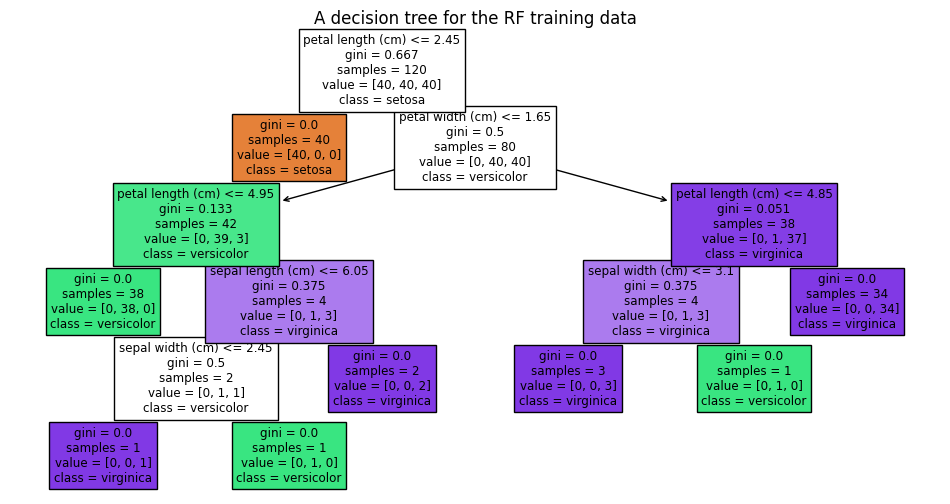

In [ ]:
#Load iris dataset
iris = load_iris(as_frame=True)
df = iris.frame
df.columns = iris.feature_names + ['target']
df['target'] = iris.target

#120 for training
train_data, _ = train_test_split(df, train_size=120, random_state=8, stratify=df['target'])

#Train a decision tree on training data
X_train = train_data.iloc[:, :-1]
y_train = train_data['target']
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

#Plot the decision tree
plt.figure(figsize=(12, 6))
plot_tree(tree_model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title('A decision tree for the RF training data')
plt.show()

Fig. 9.12 and NN recruitment decision

In [ ]:
TKS = [20, 10, 30, 20, 80, 30]
CSS = [90, 20, 40, 50, 50, 80]
Recruited = [1, 0, 0, 0, 1, 1]

#Combine into single set of data
df = pd.DataFrame({'TKS': TKS, 'CSS': CSS, 'Recruited': Recruited})

#Training the neural network
X = df[['TKS', 'CSS']]
y = df['Recruited']

# Fit neural net
model = MLPClassifier(hidden_layer_sizes=(5,), activation='logistic',
                      max_iter=10000, random_state=123)
model.fit(X, y)

#Predict new data
test_data = pd.DataFrame({'TKS': [30, 51, 72], 'CSS': [85, 51, 30]})
probabilities = model.predict_proba(test_data)[:, 1]  # get probability of class 1
decisions = (probabilities > 0.5).astype(int)

print("Probabilities:", probabilities)
print("Decisions:", decisions)

#Weights and biases
print("\nInitial Weights and Biases:")
for i, coef in enumerate(model.coefs_):
    print(f"Weights layer {i+1}:\n", coef)

for i, bias in enumerate(model.intercepts_):
    print(f"Biases layer {i+1}:\n", bias)

#Training loss
print("\nFinal training loss (approx error):", model.loss_)

Probabilities: [0.83398576 0.15517657 0.92410076]
Decisions: [1 0 1]

Initial Weights and Biases:
Weights layer 1:
 [[-0.0042373  -0.40301485 -0.36572457 -1.38952862  0.47770548]
 [ 0.05834671  0.49780745  0.45158989  0.58152085 -0.58277848]]
Weights layer 2:
 [[ 2.58541055]
 [-1.66138712]
 [-1.76589655]
 [ 2.30411114]
 [ 1.5124255 ]]
Biases layer 1:
 [-2.87370885  0.50389049  0.36483136 -2.75590571 -0.73388579]
Biases layer 2:
 [0.48711141]

Final training loss (approx error): 0.15102892520556685


Fig. 9.13: Curve of a logistic function

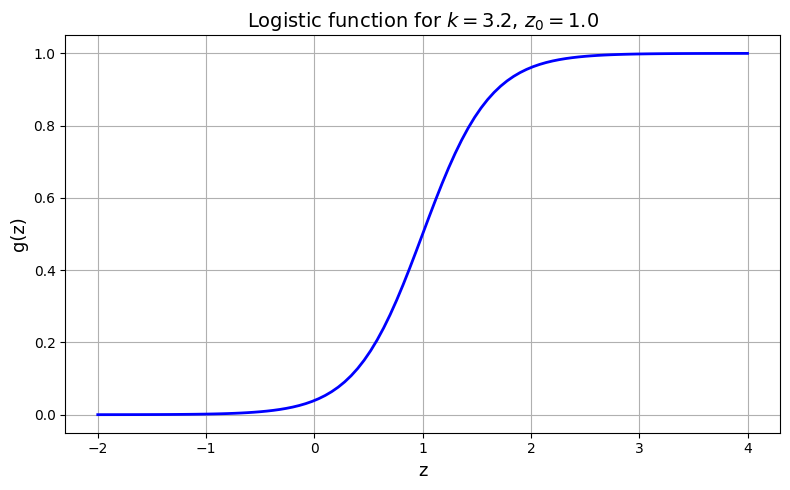

In [ ]:
z = np.linspace(-2, 4, 101)
k = 3.2
z0 = 1
g = 1 / (1 + np.exp(-k * (z - z0)))

#Plot
plt.figure(figsize=(8, 5))
plt.plot(z, g, color='blue', linewidth=2)
plt.xlabel('z', fontsize=13)
plt.ylabel('g(z)', fontsize=13)
plt.title(r'Logistic function for $k = 3.2$, $z_0 = 1.0$', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

NN code for the Fisher iris flower data

In [ ]:
#Load iris dataset
iris_raw = load_iris()
X = pd.DataFrame(iris_raw.data, columns=iris_raw.feature_names)
y = iris_raw.target  # 0 = setosa, 1 = versicolor, 2 = virginica

#Create boolean columns
iris = X.copy()
iris['setosa'] = (y == 0).astype(int)
iris['versicolor'] = (y == 1).astype(int)
iris['virginica'] = (y == 2).astype(int)

#Split data: 50% training, 50% test
X_train, X_test, y_train_idx, y_test_idx = train_test_split(
    iris_raw.data, y, test_size=0.5, random_state=42, stratify=y)

#Convert y_train to one-hot encoding for training
y_train_onehot = to_categorical(y_train_idx, num_classes=3)

#Define the neural network
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 output classes

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train_onehot, epochs=200, verbose=0)

#Predict on test set
pred_probs = model.predict(X_test)
pred_classes = np.argmax(pred_probs, axis=1)

#Print first few predictions
print("First 3 predicted class probabilities:\n", pred_probs[:3])
print("Last 6 predicted classes:\n", pred_classes[-6:])

#Map numeric predictions back to species names
class_names = iris_raw.target_names
predicted_species = class_names[pred_classes]
print("First 6 predicted species:\n", predicted_species[:6])

#Confusion matrix
actual_species = class_names[y_test_idx]
conf_matrix = pd.crosstab(predicted_species, actual_species, rownames=['Predicted'], colnames=['Actual'])
print("\nConfusion Matrix:\n", conf_matrix)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
First 3 predicted class probabilities:
 [[9.67123747e-01 3.28064747e-02 6.97028954e-05]
 [9.64645147e-01 3.52657959e-02 8.91405871e-05]
 [9.60621953e-01 3.92559618e-02 1.21969846e-04]]
Last 6 predicted classes:
 [0 1 0 2 2 2]
First 6 predicted species:
 ['setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'setosa']

Confusion Matrix:
 Actual      setosa  versicolor  virginica
Predicted                                
setosa          25           0          0
versicolor       0          25          0
virginica        0           0         25
